In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib import cm
import geojson
import json
import os



In [2]:
#NY coordinates
nyc_longitude_west = -74.25559
nyc_longitude_east = -73.70001
nyc_latitude_north = 40.91553
nyc_latitude_south = 40.49612

In [6]:
data = pd.read_csv('aggdata_2016-05.csv')
data.head()

,tpep_pickup_datetime,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,2016-05-01 00:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-05-01 01:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016-05-01 02:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016-05-01 03:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-05-01 04:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#no trips
(data.sum(axis=0)==0).astype(int).sum()

1283

In [8]:
regions = pd.read_csv("data/regions.csv", sep=";", index_col='region')
regions['color_sum']=data.sum()[1:].values.astype('float')
regions['color_mean']=data.mean().values
regions.head()

,west,east,south,north,color_sum,color_mean
region,,,,,,
1,-74.25559,-74.244478,40.496120,40.504508,0.0,0.0
2,-74.25559,-74.244478,40.504508,40.512896,0.0,0.0
3,-74.25559,-74.244478,40.512896,40.521285,0.0,0.0
4,-74.25559,-74.244478,40.521285,40.529673,0.0,0.0
5,-74.25559,-74.244478,40.529673,40.538061,0.0,0.0


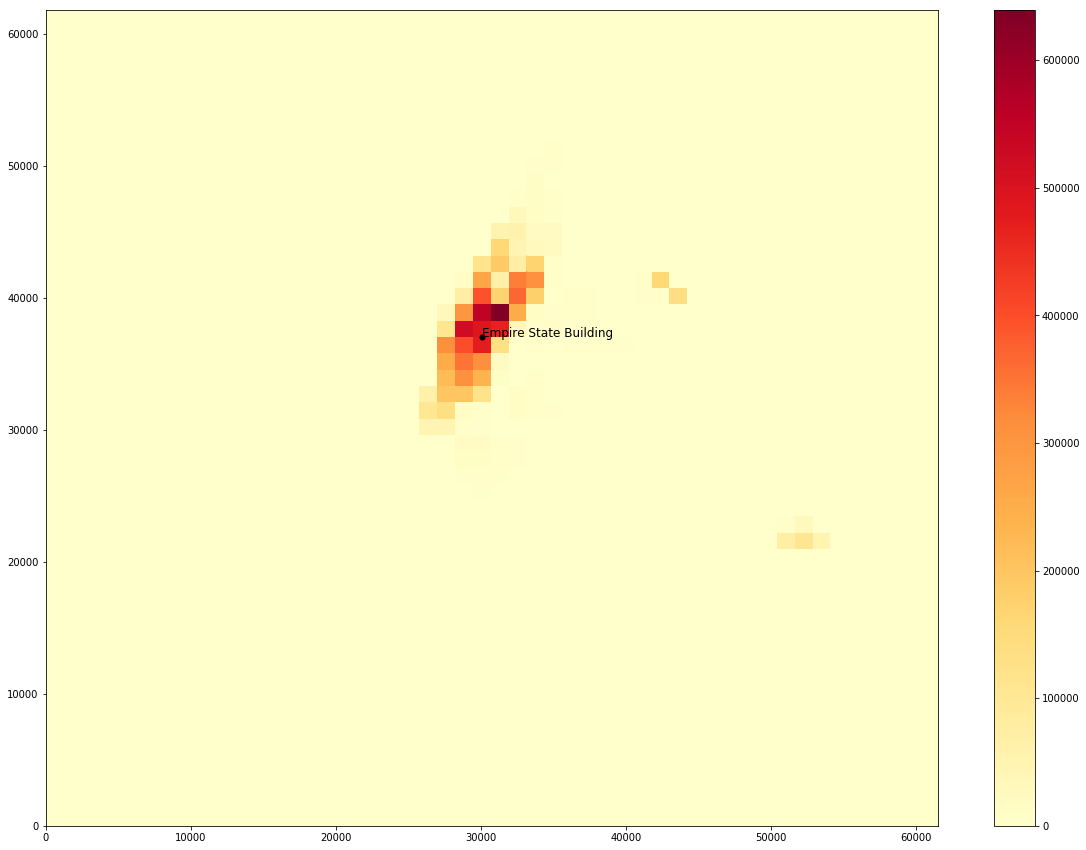

In [9]:



#NY on map
plt.figure(figsize=(20, 15))

ny_map = Basemap(projection='merc', llcrnrlat= nyc_latitude_south, llcrnrlon= nyc_longitude_west, 
                 urcrnrlat= nyc_latitude_north, urcrnrlon= nyc_longitude_east,
                 resolution='f')


x, y = ny_map(-73.985428, 40.748817)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'Empire State Building', fontsize=12);



lons = np.unique(np.append(regions['west'], regions['east']))
lats = np.unique(np.append(regions['south'], regions['north'])).reshape(-1, 1)
hgt = regions['color_sum'].values.reshape(50, 50)
lons,lats=np.meshgrid(lons,lats)
xs, ys = ny_map(lons, lats)

plt.pcolormesh(ys, xs, hgt, cmap='YlOrRd')
plt.colorbar()


plt.show()

In [10]:
#scalable map with cursor at liberty statue 

import folium
import branca

xLib=-74.04444
yLib =40.68917

m = folium.Map(location=[yLib,  xLib], tiles='cartodbpositron', zoom_start = 10.4,  min_zoom = 10.4)
folium.Marker(location = [yLib, xLib,], popup='Statue of Liberty' ).add_to(m)
m

C:\Python27\lib\site-packages\folium\__init__.py:59: UserWarning: This version of folium is the last to support Python 2. Transition to Python 3 to be able to receive updates and fixes. Check out https://python3statement.org/ for more info.
  UserWarning


In [20]:
#average trip amount in described by colour
average_map = folium.Map(location=[yLib,  xLib], tiles='cartodbpositron', zoom_start = 10.4,  min_zoom = 10.4)
colormap = branca.colormap.linear.YlOrRd_09.scale(data.mean().min(), data.mean().max())
for i in range(1, len(regions) + 1):
    reg=regions.loc[i]
    if reg['color_mean']<1:
        continue
    ls = folium.PolyLine(
        locations=[[reg['south'], reg['west']], [reg['south'], reg['east']], [reg['north'], reg['east']],  [reg['north'], reg['west']]],
        color=colormap(reg['color_mean']),
        weight=0,
        fill_color=colormap(reg['color_mean']),
        fill_opacity=0.5
    )
    ls.add_to(average_map)
colormap.add_to(average_map)
folium.Marker(location = [yLib, xLib], popup='Statue of Liberty' ).add_to(average_map)
average_map

In [ ]:
mean_hour_trips_count = grouped.groupby(['region'])['trips_count'].mean()
len(mean_hour_trips_count[mean_hour_trips_count >= 5])

In [21]:
#skip trips value < 5

m = folium.Map(location=[yLib,  xLib], tiles='cartodbpositron', zoom_start = 10.4,  min_zoom = 10.4)
colormap = branca.colormap.linear.YlOrRd_09.scale(data.mean().min(), data.mean().max())
counter = 0
for i in range(1, len(regions)+1):
    reg=regions.loc[i]
    if reg['color_mean']<5:
        counter += 1 
        continue
    ls = folium.PolyLine(
        locations=[[reg['south'], reg['west']], [reg['south'], reg['east']], [reg['north'], reg['east']],  [reg['north'], reg['west']]],
        color=colormap(reg['color_mean']),
        weight=0,
        fill_color=colormap(reg['color_mean']),
        fill_opacity=0.5
    )
    ls.add_to(m)
colormap.add_to(m)
folium.Marker([yLib, xLib], tooltip='Statue of Liberty' ).add_to(m)
print(counter)
m




2398
